<a href="https://colab.research.google.com/github/heav2308/scraping-tecnoempleo/blob/main/Anaisis_datos_tecnoempleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Navegar a la ubicación del archivo y cargarlo
df = pd.read_csv('/content/drive/My Drive/tecnoempleo_ofertas(13-08-24).csv')

# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

df.head()

Mounted at /content/drive


,Título,Enlace,CVs inscritos,Ubicación,Funciones,Jornada,Experiencia,Tipo contrato,Salario Mínimo,Salario Máximo,Descripción
0,UrgenteSenior Angular Developer,https://www.tecnoempleo.com/senior-angular-dev...,132.0,100% En remoto,Analista Programador,Jornada completa,5.0,Indefinido,39000.0,48000.0,¿Te interesaría seguir desarrollándote como Se...
1,OT Architect Cybersecurity,https://www.tecnoempleo.com/ot-architect-cyber...,0.0,Madrid (Presencial),Ciberseguridad,Jornada completa,3.0,Indefinido,48000.0,54000.0,¿Te interesaría seguir desarrollándote como Ar...
2,UrgenteDesarrollador Backend EDA,https://www.tecnoempleo.com/desarrollador-back...,16.0,100% En remoto,Arquitecto TIC,Jornada completa,3.0,Indefinido,NaN,NaN,En NPR estamos muy comprometidos con la innova...
3,UrgenteTécnico/a en robótica,https://www.tecnoempleo.com/tecnico-en-robotic...,33.0,Madrid (Presencial),Electrónica,Jornada completa,1.0,Indefinido,24000.0,27000.0,"En La Fábrica de Software, nos encontramos en ..."
4,Técnico/a Test & Commissioning,https://www.tecnoempleo.com/tecnico-test-commi...,0.0,100% En remoto,Tester,Jornada completa,5.0,Indefinido,NaN,NaN,"Desde Grupo Digital, estamos en búsqueda de un..."


In [2]:
# Limpiando y extrayendo por 'Ubicación' para analizar la distribución geográfica

# Estandarizando la columna 'Ubicación' removiendo caracteres especiales y extrayendo la ciudad
df['Ubicación'] = df['Ubicación'].str.strip().str.split(',').str[0].str.split('(').str[0].str.replace(r'[\t\r\n]+', ' ', regex=True).str.strip()

# Contando el número de ofertas por ubicación
distribucion_ubicacion = df['Ubicación'].value_counts()

distribucion_ubicacion.head(20)  # Muestra el top 20 de las ubicaciones con mas ofertas

,count
Ubicación,
Madrid - España,1235
100% En remoto,566
Madrid,506
Torrejón De Ardoz - Madrid España,453
Barcelona - España,342
Barcelona,277
San Fernando De Henares - Madrid España,226
Santa Cruz De Tenerife - Sta. Cruz De Tenerife España,226
Pozuelo - Madrid - España,226


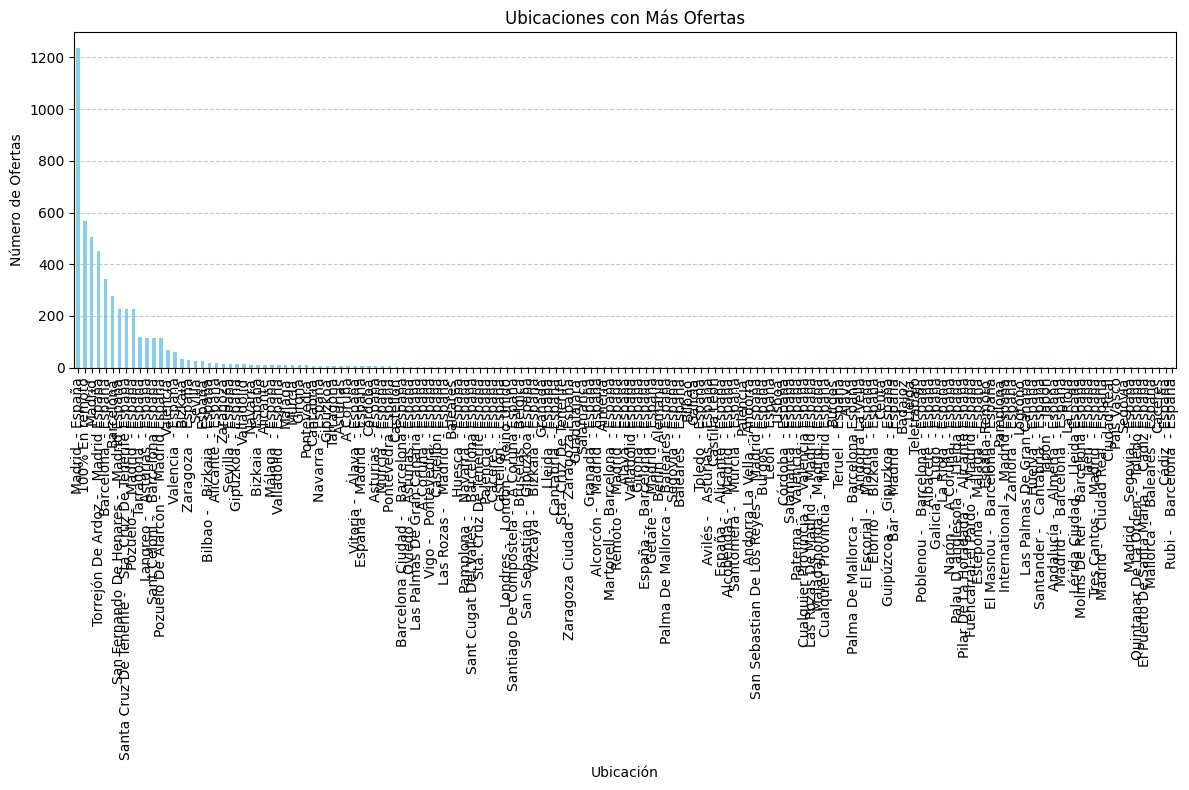

In [3]:
# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
distribucion_ubicacion.plot(kind='bar', color='skyblue')
plt.title('Ubicaciones con Más Ofertas')
plt.xlabel('Ubicación')
plt.ylabel('Número de Ofertas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

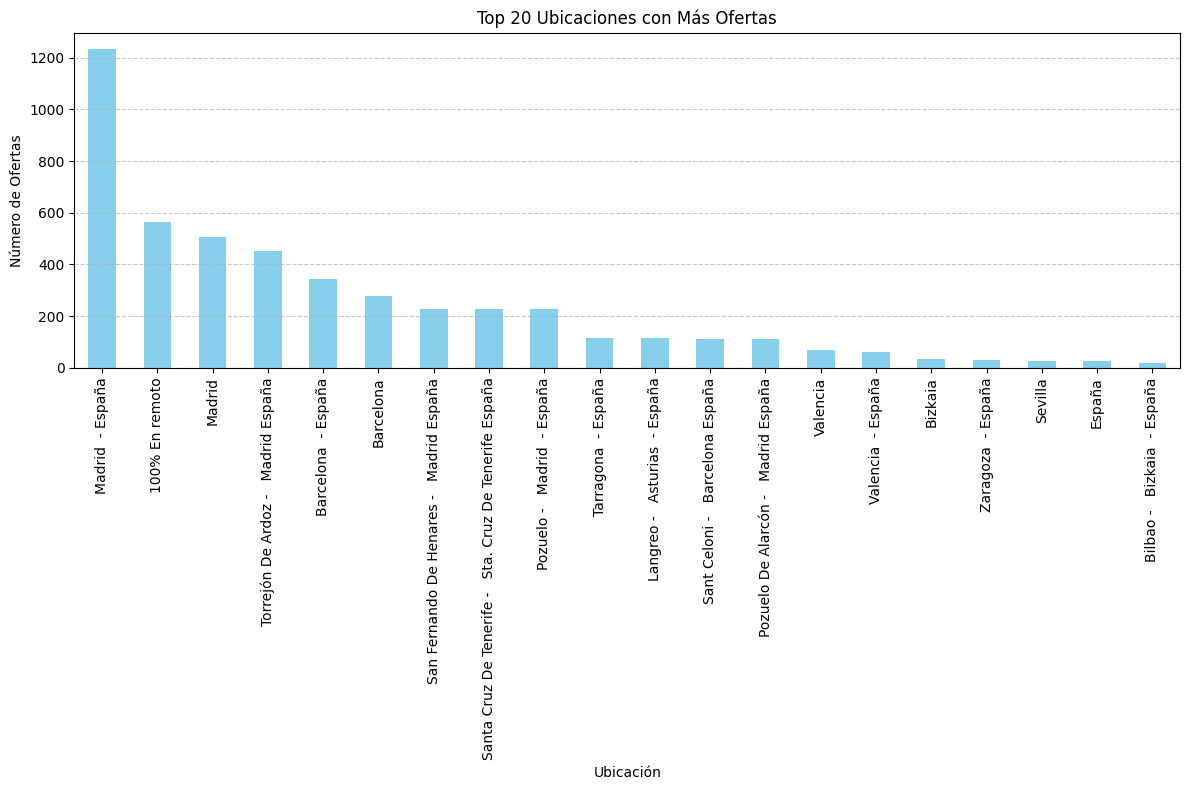

In [4]:
top_ubicaciones = distribucion_ubicacion.head(20)

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
top_ubicaciones.plot(kind='bar', color='skyblue')
plt.title('Top 20 Ubicaciones con Más Ofertas')
plt.xlabel('Ubicación')
plt.ylabel('Número de Ofertas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

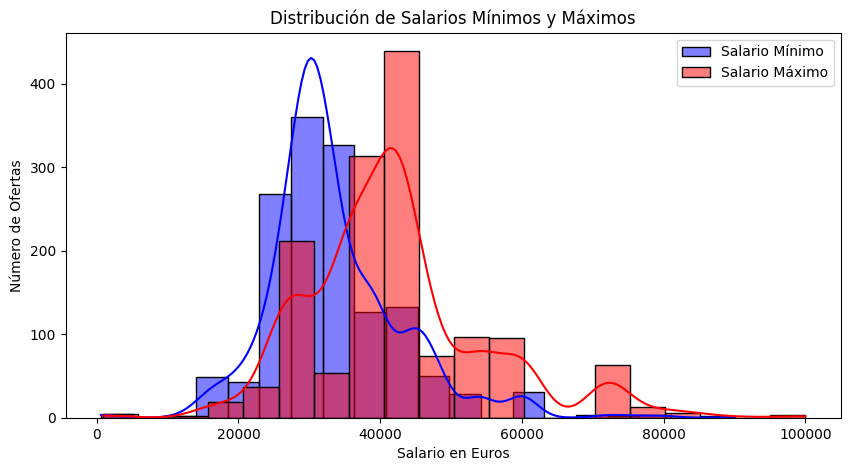

In [6]:
# Filtrar los datos donde los salarios mínimo y máximo sean mayores que 0
df_salary = df[(df['Salario Mínimo'] > 0) & (df['Salario Máximo'] > 0)]

# Crear el histograma para el salario mínimo
plt.figure(figsize=(10, 5))
sns.histplot(df_salary['Salario Mínimo'], bins=20, kde=True, color='blue', label='Salario Mínimo', alpha=0.5)

# Crear el histograma para el salario máximo
sns.histplot(df_salary['Salario Máximo'], bins=20, kde=True, color='red', label='Salario Máximo', alpha=0.5)

# Personalizar el gráfico
plt.title('Distribución de Salarios Mínimos y Máximos')
plt.xlabel('Salario en Euros')
plt.ylabel('Número de Ofertas')
plt.legend()

# Mostrar el gráfico
plt.show()

In [7]:
# Crear una nueva columna que calcule el promedio del salario mínimo y máximo
df_salary['Salario Promedio'] = df_salary[['Salario Mínimo', 'Salario Máximo']].mean(axis=1)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
df_salary.head()

<ipython-input-7-857a3cb51172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['Salario Promedio'] = df_salary[['Salario Mínimo', 'Salario Máximo']].mean(axis=1)


,Título,Enlace,CVs inscritos,Ubicación,Funciones,Jornada,Experiencia,Tipo contrato,Salario Mínimo,Salario Máximo,Descripción,Salario Promedio
0,UrgenteSenior Angular Developer,https://www.tecnoempleo.com/senior-angular-dev...,132.0,100% En remoto,Analista Programador,Jornada completa,5.0,Indefinido,39000.0,48000.0,¿Te interesaría seguir desarrollándote como Se...,43500.0
1,OT Architect Cybersecurity,https://www.tecnoempleo.com/ot-architect-cyber...,0.0,Madrid,Ciberseguridad,Jornada completa,3.0,Indefinido,48000.0,54000.0,¿Te interesaría seguir desarrollándote como Ar...,51000.0
3,UrgenteTécnico/a en robótica,https://www.tecnoempleo.com/tecnico-en-robotic...,33.0,Madrid,Electrónica,Jornada completa,1.0,Indefinido,24000.0,27000.0,"En La Fábrica de Software, nos encontramos en ...",25500.0
8,Técnico/a Microinformática,https://www.tecnoempleo.com/tecnico-microinfor...,1.0,Barcelona,Soporte Técnico,Jornada completa,3.0,Indefinido,18000.0,24000.0,En NexTRet contamos con una vacante como Técni...,21000.0
10,Ingeniero/a,https://www.tecnoempleo.com/ingeniero-a-bizkai...,0.0,Bizkaia - España,Ingenieros/Industria,Jornada completa,5.0,Indefinido,45000.0,60000.0,Uno de nuestros clientes del sector industrial...,52500.0


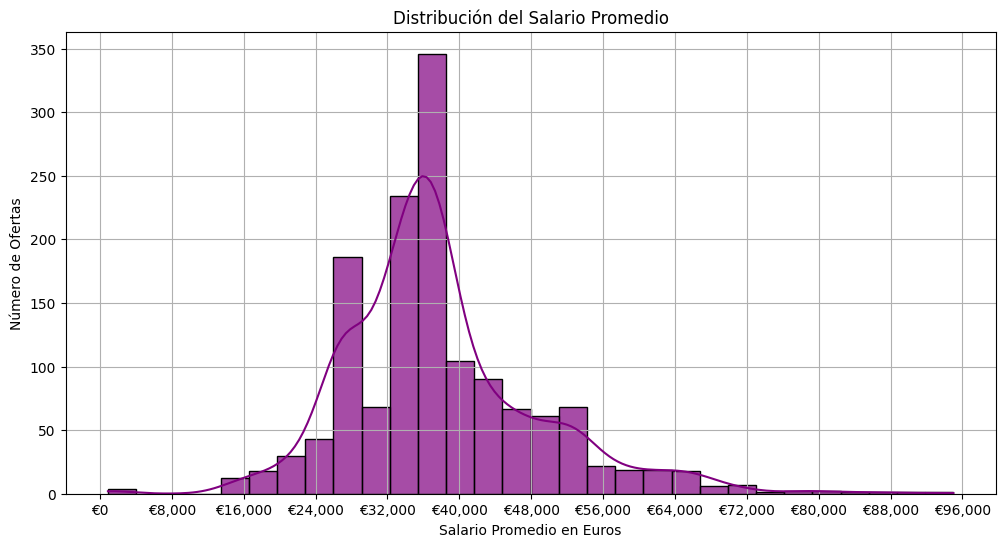

In [17]:
import matplotlib.ticker as mticker  # Importar el módulo ticker para formatear los ejes

# Generar el histograma del salario promedio
plt.figure(figsize=(12, 6))
sns.histplot(df_salary['Salario Promedio'], bins=30, kde=True, color='purple', alpha=0.7)

# Personalizar el gráfico
plt.title('Distribución del Salario Promedio')
plt.xlabel('Salario Promedio en Euros')
plt.ylabel('Número de Ofertas')
plt.grid(True)

# Ajustar el formato del eje X para mostrar más detalles y añadir el símbolo €
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'€{int(x):,}'))
ax.xaxis.set_major_locator(mticker.MaxNLocator(17))  # Ajustar para tener más ticks en el eje X

# Mostrar el gráfico
plt.show()

In [18]:
# Limpiando datos para el analisis de salarios
df['Salario Mínimo'].fillna(0, inplace=True)
df['Salario Máximo'].fillna(0, inplace=True)

# Estadisticas de salarios: minimo, maximo, promedio
min_salary = df['Salario Mínimo'].min()
max_salary = df['Salario Máximo'].max()
avg_salary = (df['Salario Mínimo'].mean() + df['Salario Máximo'].mean()) / 2

# Distribicuión de salarios (count non-zero salaries)
salary_distribution = df[(df['Salario Mínimo'] > 0) & (df['Salario Máximo'] > 0)][['Salario Mínimo', 'Salario Máximo']]

min_salary, max_salary, avg_salary, salary_distribution.describe()

(0.0,
 100000.0,
 10373.666730658475,
        Salario Mínimo  Salario Máximo
 count     1431.000000     1431.000000
 mean     33497.456324    42025.157233
 std       9412.946758    12875.176809
 min        600.000000      900.000000
 25%      27000.000000    36000.000000
 50%      30000.000000    42000.000000
 75%      39000.000000    45000.000000
 max      90000.000000   100000.000000)

In [21]:
# 1. Análisis del Rango Salarial

# Filtrando las filas donde ambos salarios (mínimo y máximo) están disponibles
df_salary = df[(df['Salario Mínimo'] > 0) & (df['Salario Máximo'] > 0)]

# Estadísticas salariales
min_salary = df_salary['Salario Mínimo'].min()
max_salary = df_salary['Salario Máximo'].max()
avg_salary = df_salary[['Salario Mínimo', 'Salario Máximo']].mean().mean()

# 2. Experiencia Requerida
# Clasificación según la experiencia
experience_bins = [0, 2, 5, 100]
experience_labels = ['Junior', 'Mid', 'Senior']
df['Nivel Experiencia'] = pd.cut(df['Experiencia'], bins=experience_bins, labels=experience_labels, right=False)
experience_distribution = df['Nivel Experiencia'].value_counts()

# 3. Tipo de Contrato
contract_type_distribution = df['Tipo contrato'].value_counts()

# 4. Tecnologías/Competencias Requeridas
# Para la frecuencia de tecnologías, se busca en la columna 'Descripción'
# Lista de tecnologías
technologies = ['Python', 'SQL', 'Machine Learning', 'Java', 'JavaScript', 'C#', 'C++', 'AWS', 'Azure', 'Docker']

# Diccionario para almacenar las frecuencias
technology_frequency = {}

# Bucle para calcular la frecuencia de cada tecnología
for tech in technologies:
    try:
        # Escapar caracteres especiales
        escaped_tech = re.escape(tech)
        # Calcular la frecuencia
        frequency = df['Descripción'].str.contains(escaped_tech, case=False, na=False).sum()
        technology_frequency[tech] = frequency
    except Exception as e:
        print(f"Error con la tecnología {tech}: {e}")

technology_frequency

# 5. Frecuencia de Ofertas por Sector
# Esto implicará buscar palabras clave comunes para identificar sectores
sectors = ['Tecnológico', 'Financiero', 'Salud', 'Retail', 'Educación']
sector_frequency = {sector: df['Descripción'].str.contains(sector, case=False, na=False).sum() for sector in sectors}

# Outputs
min_salary, max_salary, avg_salary, experience_distribution, contract_type_distribution, technology_frequency, sector_frequency

(600.0,
 100000.0,
 37761.30677847659,
 Nivel Experiencia
 Mid       3070
 Junior    1548
 Senior     582
 Name: count, dtype: int64,
 Tipo contrato
 Indefinido            3732
 A determinar           834
 Prácticas              474
 Temporal               134
 Freelance/Autónomo      21
 Obra o servicio          5
 Name: count, dtype: int64,
 {'Python': 543,
  'SQL': 972,
  'Machine Learning': 55,
  'Java': 1327,
  'JavaScript': 241,
  'C#': 213,
  'C++': 566,
  'AWS': 371,
  'Azure': 571,
  'Docker': 299},
 {'Tecnológico': 492,
  'Financiero': 190,
  'Salud': 220,
  'Retail': 74,
  'Educación': 26})

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

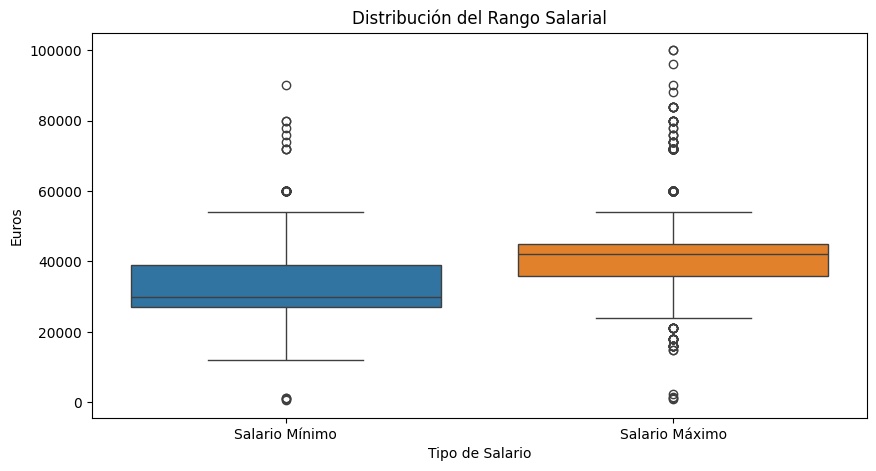

In [23]:
# Gráfico del rango salarial
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_salary[['Salario Mínimo', 'Salario Máximo']])
plt.title('Distribución del Rango Salarial')
plt.xlabel('Tipo de Salario')
plt.ylabel('Euros')
plt.show()

<ipython-input-24-6560dbf65e60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_distribution.index, y=experience_distribution.values, palette='viridis')


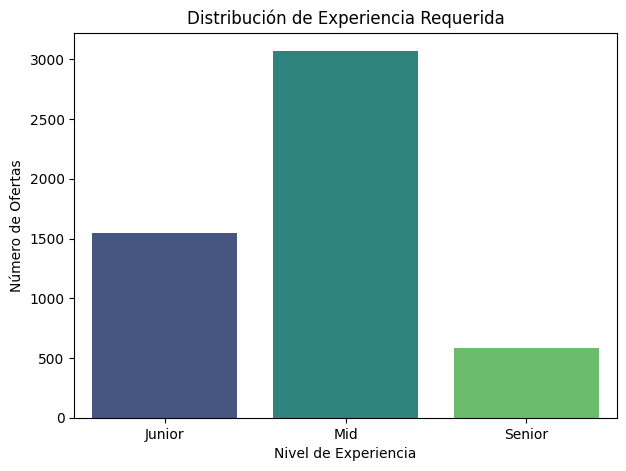

In [24]:
# Gráfico de distribución de experiencia
plt.figure(figsize=(7, 5))
sns.barplot(x=experience_distribution.index, y=experience_distribution.values, palette='viridis')
plt.title('Distribución de Experiencia Requerida')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Número de Ofertas')
plt.show()

<ipython-input-25-1584354e2215>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_type_distribution.index, y=contract_type_distribution.values, palette='magma')


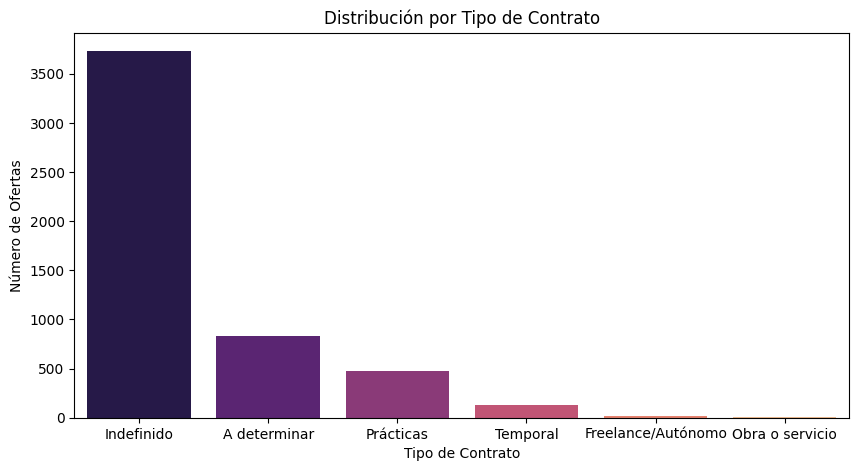

In [25]:
# Gráfico de tipos de contrato
plt.figure(figsize=(10, 5))
sns.barplot(x=contract_type_distribution.index, y=contract_type_distribution.values, palette='magma')
plt.title('Distribución por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Ofertas')
plt.show()

<ipython-input-26-34c070dee808>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(technology_frequency.keys()), y=list(technology_frequency.values()), palette='coolwarm')


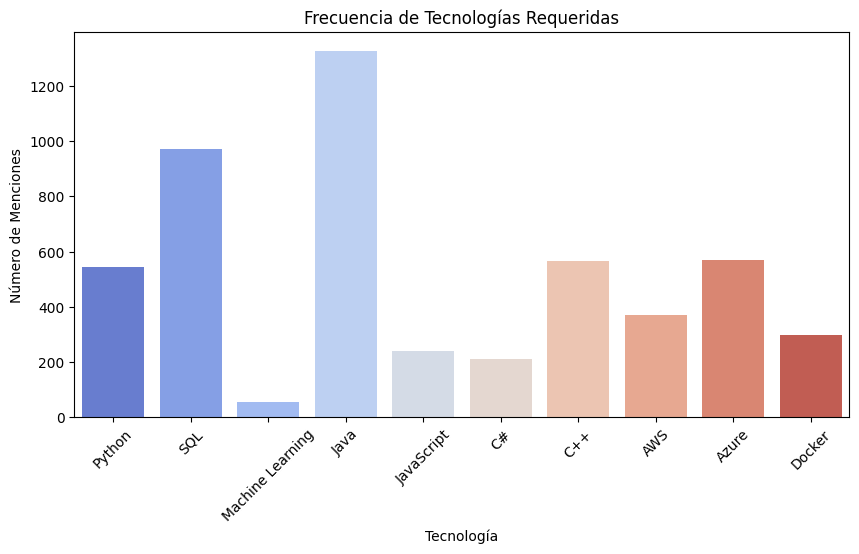

In [26]:
# Gráfico de frecuencia de tecnologías
plt.figure(figsize=(10, 5))
sns.barplot(x=list(technology_frequency.keys()), y=list(technology_frequency.values()), palette='coolwarm')
plt.title('Frecuencia de Tecnologías Requeridas')
plt.xlabel('Tecnología')
plt.ylabel('Número de Menciones')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-c58a1cd132d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sector_frequency.keys()), y=list(sector_frequency.values()), palette='cividis')


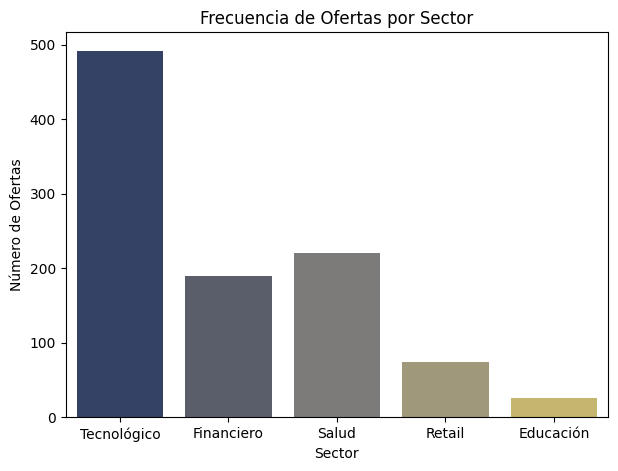

In [27]:
plt.figure(figsize=(7, 5))
sns.barplot(x=list(sector_frequency.keys()), y=list(sector_frequency.values()), palette='cividis')
plt.title('Frecuencia de Ofertas por Sector')
plt.xlabel('Sector')
plt.ylabel('Número de Ofertas')
plt.show()

<ipython-input-31-4fd84899ad35>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tecnología', y='Salario Promedio', data=df_tech_salary, palette="Set2")


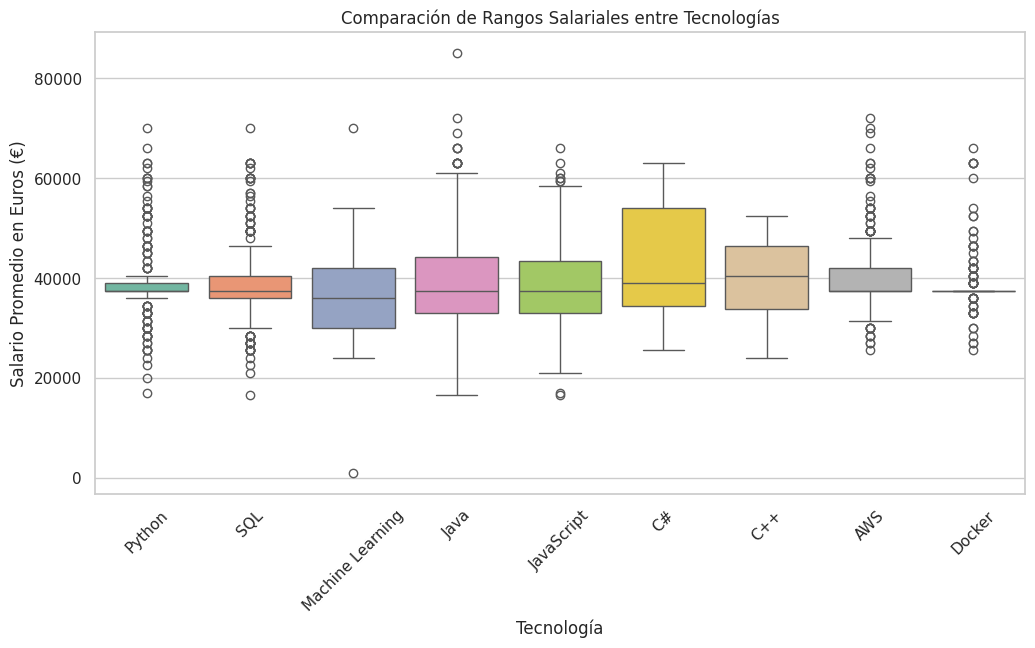

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Filtrar los datos donde los salarios mínimo y máximo sean mayores que 0 y crear una copia
df_salary = df[(df['Salario Mínimo'] > 0) & (df['Salario Máximo'] > 0)].copy()

# Crear una nueva columna que calcule el promedio del salario mínimo y máximo
df_salary['Salario Promedio'] = df_salary[['Salario Mínimo', 'Salario Máximo']].mean(axis=1)

# Lista de tecnologías a analizar
technologies = ['Python', 'SQL', 'Machine Learning', 'Java', 'JavaScript', 'C#', 'C++', 'AWS', 'Docker']

# Crear una columna extra para marcar si una tecnología está presente en la descripción
for tech in technologies:
    escaped_tech = re.escape(tech)  # Escapar caracteres especiales
    df_salary[tech] = df_salary['Descripción'].str.contains(escaped_tech, case=False, na=False)

# Crear un DataFrame para las tecnologías y sus respectivos salarios
df_tech_salary = pd.melt(df_salary,
                         id_vars=['Salario Promedio'],
                         value_vars=technologies,
                         var_name='Tecnología',
                         value_name='Presente')

# Filtrar solo las filas donde la tecnología está presente
df_tech_salary = df_tech_salary[df_tech_salary['Presente'] == True]

# Generar boxplots comparando los salarios promedio entre tecnologías
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tecnología', y='Salario Promedio', data=df_tech_salary, palette="Set2")

# Personalizar el gráfico
plt.title('Comparación de Rangos Salariales entre Tecnologías')
plt.xlabel('Tecnología')
plt.ylabel('Salario Promedio en Euros (€)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para que se vean mejor

# Mostrar el gráfico
plt.show()



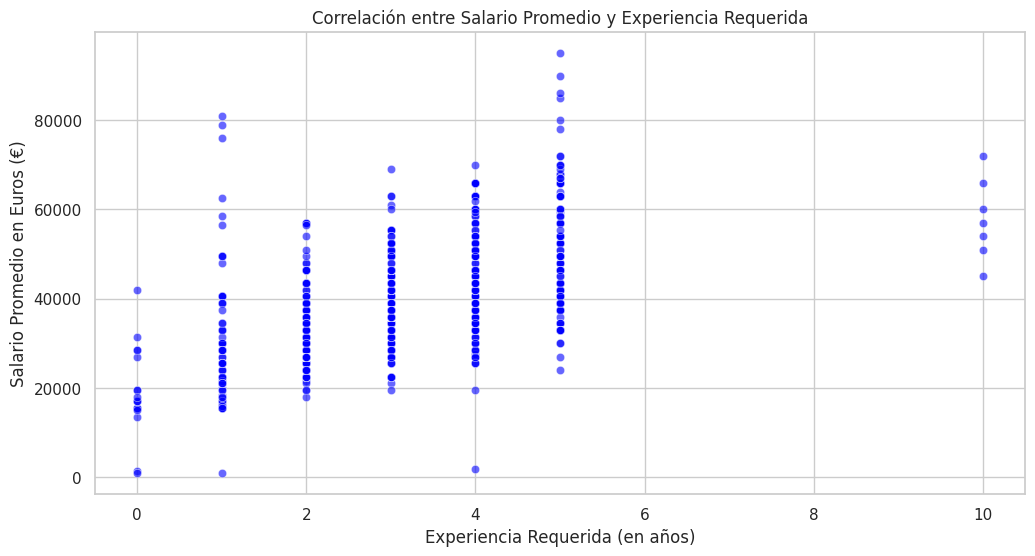

In [37]:
# Filtrar los datos válidos
df_salary_filtrado = df_salary.dropna(subset=['Salario Promedio', 'Experiencia'])

# Graficar la correlación entre el salario promedio y la experiencia
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Experiencia', y='Salario Promedio', data=df_salary_filtrado, color='blue', alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Correlación entre Salario Promedio y Experiencia Requerida')
plt.xlabel('Experiencia Requerida (en años)')
plt.ylabel('Salario Promedio en Euros (€)')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [35]:
print(df_salary)

                               Título  \
0     UrgenteSenior Angular Developer   
1          OT Architect Cybersecurity   
3        UrgenteTécnico/a en robótica   
8          Técnico/a Microinformática   
10                        Ingeniero/a   
...                               ...   
5184                           DevOps   
5185             Arquitecto Fullstack   
5190             Service Desk Analyst   
5204     Administrador Sistemas Linux   
5205             Arquitecto Fullstack   

                                                 Enlace  CVs inscritos  \
0     https://www.tecnoempleo.com/senior-angular-dev...          132.0   
1     https://www.tecnoempleo.com/ot-architect-cyber...            0.0   
3     https://www.tecnoempleo.com/tecnico-en-robotic...           33.0   
8     https://www.tecnoempleo.com/tecnico-microinfor...            1.0   
10    https://www.tecnoempleo.com/ingeniero-a-bizkai...            0.0   
...                                                 ...        